In [7]:
from src.texture_synthesis.feature_extractor import FeatureExtractor
from src.texture_synthesis.function import *
from src.texture_synthesis.gen import SlowGen, FastGen
import torch
import numpy as np
from src.texture_synthesis.adain_autoencoder import AdaINAutoencoder

In [8]:
device = torch.device('cpu')

In [9]:
device=torch.device("cuda" if (torch.cuda.is_available()) else 'cpu')
FE = FeatureExtractor().to(device)

image = load_from_url("https://s3.envato.com/files/269276611/Green%20leaves%20with%20texture.jpg").resize((256, 256))
t = FE.get_style_representation(image_to_tensor(image, False).to(device), K=2)

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 2.00 GiB total capacity; 452.47 MiB already allocated; 0 bytes free; 618.00 MiB reserved in total by PyTorch)

In [4]:
t = t.detach()

In [ ]:
SG = SlowGen(FE, device)
result = SG.run(t, [256, 256], 5)

  0%|          | 0/5 [00:05<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 2.00 GiB total capacity; 452.48 MiB already allocated; 0 bytes free; 618.00 MiB reserved in total by PyTorch)

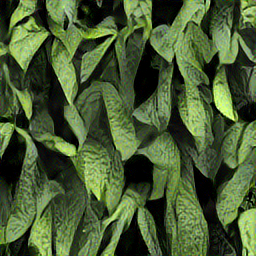

In [9]:
tensor_to_image(result.clip(0, 1), False)

In [10]:
AA = AdaINAutoencoder().to(device)

In [11]:
FG = FastGen(FE, AA, device)
result = FG.run(t, [256, 256], 1, 1)

Epoch: 0: 100%|██████████| 1/1 [01:01<00:00, 61.46s/it]


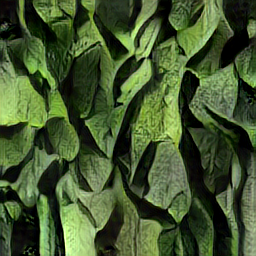

In [12]:
tensor_to_image(result.clip(0,1), False)